# Visualizing FordGoBike Data

## by Salma Mohsen

## Investigation Overview

> this investigation of the Ford GoBike System, I wanted to look at the most common bike usage pattern and customer habit characteristics

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv('df2.csv')

## Ford GoBike System Usage by Hour

> Most usage are during of 8-9am,and 17-18, which means theyued it commute to work

<Figure size 841.68x595.44 with 0 Axes>

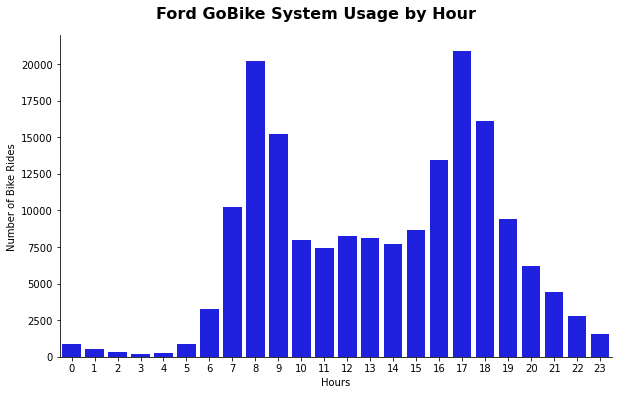

In [5]:
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df, x='start_time_hour', kind='count', color ="blue", aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

## Hourly Usage during Weekdays for Customers and Subscribers

> The heatmaps shows  very different usage pattern between Customers and Subscribers. Subscribers use on work days  while customers on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday.

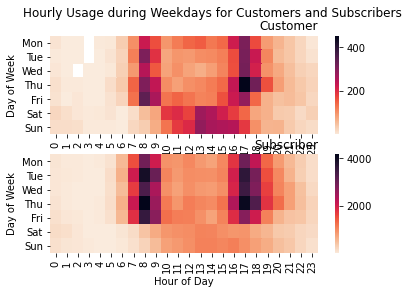

In [6]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
ct_counts.index = pd.CategoricalIndex(ct_counts.index, categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ct_counts.sort_index(level=0, inplace=True)
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
st_counts.index = pd.CategoricalIndex(st_counts.index, categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
st_counts.sort_index(level=0, inplace=True)
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

## Ford GoBike System Trends by User Type

>Customers have a low usage with a small increase on the weekends. Subscribers are the opposite there is high usage on weekdays, with a sharp decline on the weekend.

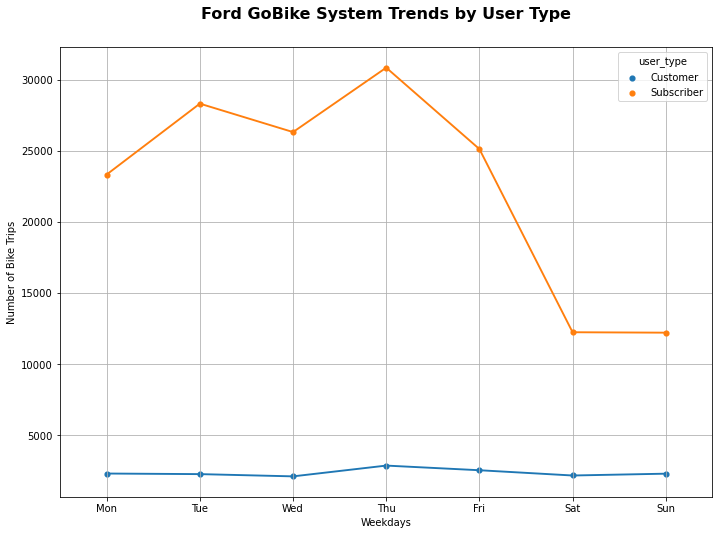

In [7]:
plt.figure(figsize=[ 11.69, 8.27]);

df_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

Summary of Findings

Bike Ride Duration Time: duration histogram has a sharp skew - bike durations range from less than 1 minute to 1400+ minutes with a mean at 11.7min. 
time is big factor Most usage are during of 8-9am,and 17-18, which means they ued it commute to work

Regarding the bike ride trends and biker types: .
There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays, usage pattern differ as many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday.
 Age is also a factor. most bikers who fall in the age group between 26-35 years old. 
Key Insights for Presentation Below are the insights for the presentation:

The distribution of biking durations is skewed. After log transformation it seams normally distrubuted 
The patterns/trends for bikers from different age group are shared
the subscriber type is the most common user type.
data is form one month only(feb).
bikers prefer to bike at these days of week Tuesday, Thursday, Wednesday.
bikers prefer to bike at 8 AM, 5 PM hours of the day.
although the number of subscriber is greater than number of customer, the average customer duration of biking is higher than subscriber.
Saturday and Sunday have the highest average duration of biking compared to other days of week.
on weekends customer type is more than subscriber 
Tuesday, Wedensday, Thursday has the most bikers in subscriber type.
 most trips concentrated around 8-9am and 17-18 on work days for subscribers 8 AM and 5 PM has the most bikers in subscriber type.
customers tend to use more in the afternoon around 17 on workdays

In [10]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 659229 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File